# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío evaluado - Análisis lineal discriminante </font>
## <center> _Algoritmos de clasificación (Parte I)_ 
    
### <center><b> Bárbara Pérez </b><center>
    

___

## <font color='MediumSeaGreen'>Requerimientos</font>

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:

- <span style='background:gainsboro'><font color='dimgray'>default</font></span>: Variable Binaria. Registra si el cliente entró en morosidad o no.
- <span style='background:gainsboro'><font color='dimgray'>income</font></span>: Ingreso promedio declarado por el cliente.
- <span style='background:gainsboro'><font color='dimgray'>balance</font></span>: total del saldo en la cuenta de crédito.
- <span style='background:gainsboro'><font color='dimgray'>student</font></span>: Variable binaria. Registra si el cliente es estudiante o no.

____________

## <font color='MediumSeaGreen'>Ejercicio 1: Preparación del Ambiente de Trabajo</font>

- Importe los módulos básicos para el análisis de datos.

- Importe las clases <span style='background:gainsboro'><font color='dimgray'>LabelEncoder</font></span>, <span style='background:gainsboro'><font color='dimgray'>StandardScaler</font></span> y <span style='background:gainsboro'><font color='dimgray'>LabelBinarizer</font></span> de preprocessing.

- Importe las funciones <span style='background:gainsboro'><font color='dimgray'>train_test_split</font></span> y <span style='background:gainsboro'><font color='dimgray'>cross_val_score</font></span> de <span style='background:gainsboro'><font color='dimgray'>model_selection</font></span>.

- Importe la función <span style='background:gainsboro'><font color='dimgray'>classification_report</font></span> de <span style='background:gainsboro'><font color='dimgray'>metrics</font></span>.

- Importe las clases <span style='background:gainsboro'><font color='dimgray'>LinearDiscriminantAnalysis</font></span> y <span style='background:gainsboro'><font color='dimgray'>QuadraticDiscriminantAnalysis</font></span>.

- Agregue la base de datos en el ambiente de trabajo.

- Inspeccione la distribución de cada atributo.

In [1]:
#librerías clásicas
import matplotlib.pyplot as plt #version 3.5.2
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0

#librería para análisis exploratorio
import pandas_profiling #version 3.2.0

#librería para pre procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

#librerias para modelamiento
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#librerías para las métricas
from sklearn.metrics import  confusion_matrix, classification_report


#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

#seteamos elementos cosméticos para los gráficos
sns.set_style("darkgrid")
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["figure.dpi"] = 100  # resolución gráficos

### Importamos funciones auxiliares

In [2]:
#importamos funciones del expositor
import lec4_graphs as gfx
import classmodelsdiag as cmd

In [3]:
#Importamos la data
df = pd.read_csv('default_credit.csv')

In [4]:
#Inspeccionamos el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    10000 non-null  int64  
 1   default  10000 non-null  object 
 2   student  10000 non-null  object 
 3   balance  10000 non-null  float64
 4   income   10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [5]:
#Revisamos la data
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [6]:
df.columns

Index(['index', 'default', 'student', 'balance', 'income'], dtype='object')

In [7]:
#Eliminamos la columna index
df = df.drop(columns = 'index')

In [8]:
#REvisamos los cambios realizados
df.sample(5)

,default,student,balance,income
962,No,No,1141.603687,38722.961191
3566,No,No,1372.935822,35467.757657
5756,No,Yes,0.000000,17648.355552
9788,No,Yes,1038.886748,10414.554353
9287,No,Yes,1084.446531,26713.797195


In [9]:
#Revisamos la data con pandas_profile
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
def histograma(dataframe):
    '''
    Función de histograma entregando Dataframe.
    
        Parameters: Dataframe.
        
        Returns: Histograma con información del dataframe y sus columnas.              
                       
    '''
    for col in dataframe.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(dataframe[col])
        plt.title(f'Histograma de {col}')
        plt.xticks(rotation=55)
        plt.show()

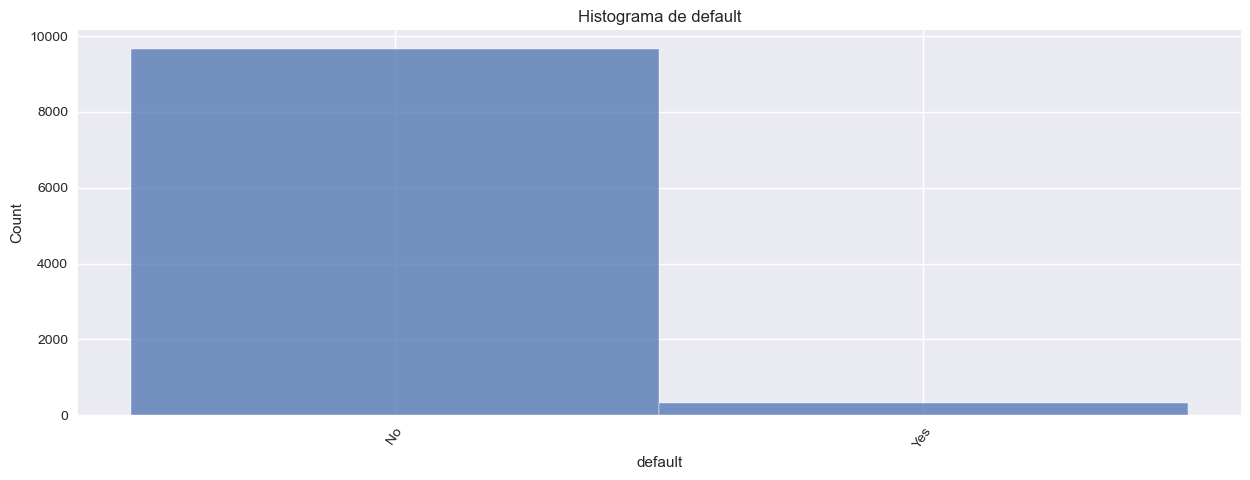

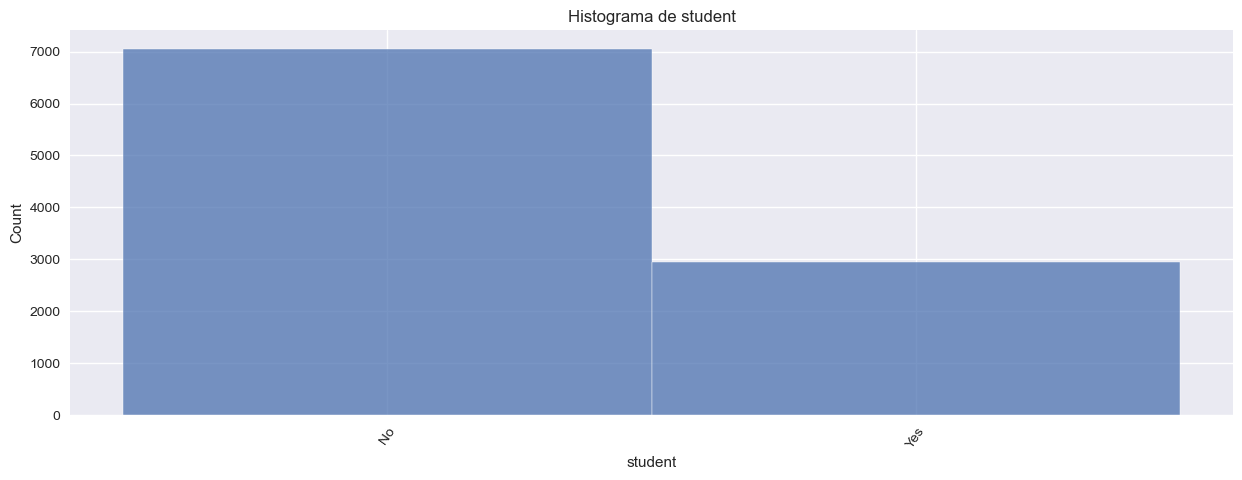

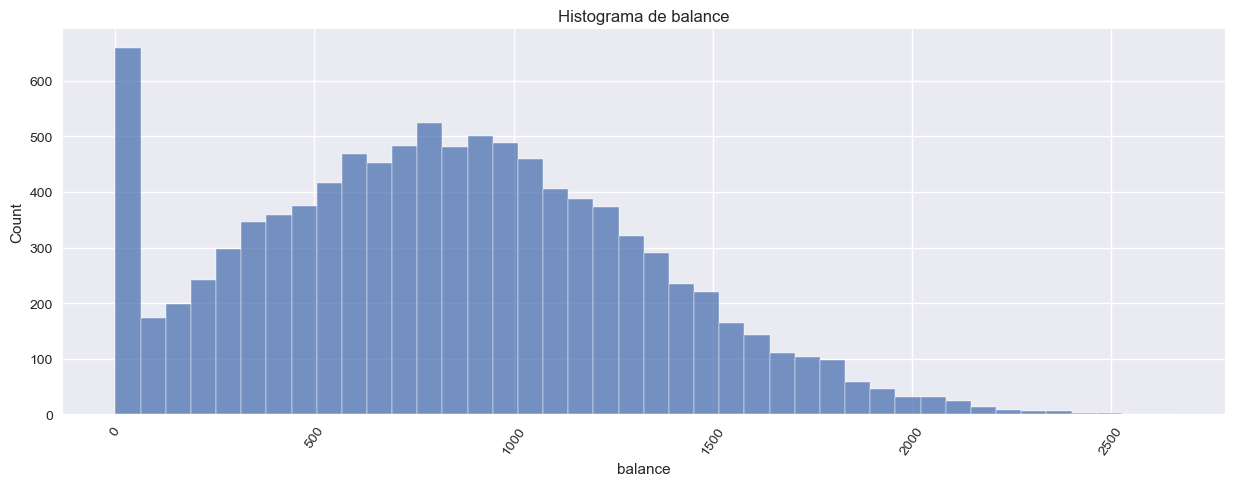

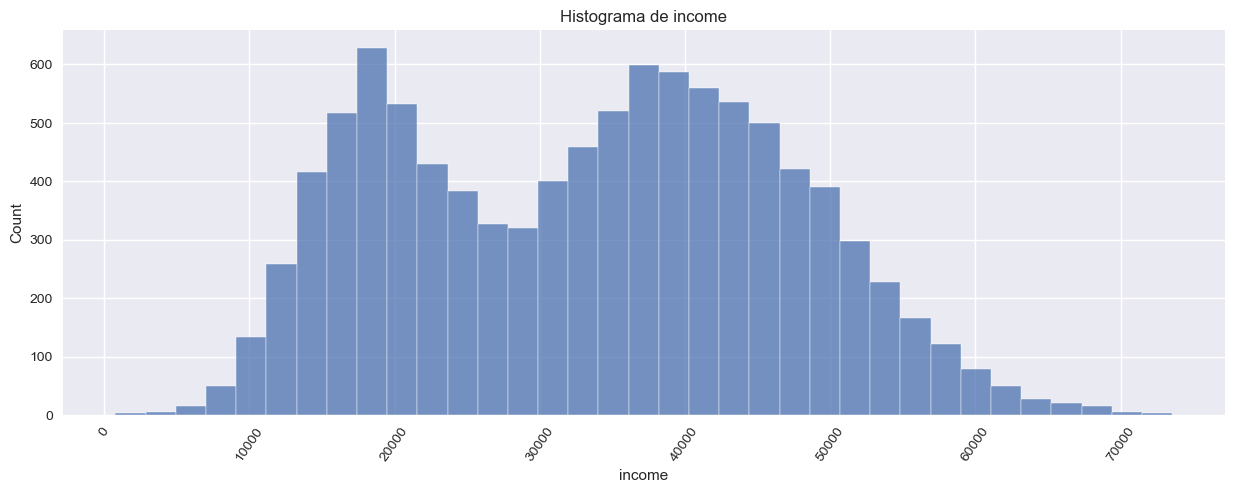

In [11]:
histograma(df)

Según los graficos mostrados anteriormente se puede observar que las variables ***'default'*** y ***'student'*** son categoricas, mientras que las variables ***'balance'*** e ***'income'*** son continuas

______

## <font color='MediumSeaGreen'>Ejercicio 2: Modelo base</font>

- Recuerde que los modelos de <span style='background:gainsboro'><font color='dimgray'>sklearn</font></span> no soportan datos que no sean numéricos. Transforme los atributos pertinentes con <span style='background:gainsboro'><font color='dimgray'>LabelEncoder</font></span>.
- Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
- Genere un modelo con <span style='background:gainsboro'><font color='dimgray'>LinearDiscriminantAnalysis</font></span> sin modificar los hiper parámetros. Genere métricas de evaluación utilizando <span style='background:gainsboro'><font color='dimgray'>classification_report</font></span>.
- Comente sobre cuál es el desempeño del modelo en cada clase, así como en general

#### Transforme los atributos pertinentes con LabelEncoder.

In [12]:
df['student'] = LabelEncoder().fit_transform (df['student'])
df['default'] = LabelEncoder().fit_transform (df['default'])

In [13]:
#Revisamos los cambios realizados
df.sample(10)

,default,student,balance,income
8562,0,0,521.736728,28401.497456
8622,0,1,895.823245,19825.629900
8033,0,0,675.225387,33700.212614
4877,0,0,337.651368,36787.019606
8575,0,0,399.877161,47291.015889
6233,0,1,503.156388,18728.296936
7757,0,1,940.479354,20578.807225
3498,0,0,470.035913,29309.127259
3339,0,0,206.820878,49221.148519
8018,0,0,1702.236683,36530.473621


#### Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.

In [14]:
#dividimos la data
X = df.drop(columns='default', axis=1) #se toman todas las variables menos la objetivo

y = df['default'] #se asigna la variable objetivo

#Separación de subsets de test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2401)

#### Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiper parámetros. Genere métricas de evaluación utilizando classification_report.

In [15]:
#Generamos un modelo con LinearDiscriminantAnalysis sin modificar los hiper parametros 
lda_model = LinearDiscriminantAnalysis()

#Entrenamos el modelo generado
lda_model.fit (X_train, y_train)

LinearDiscriminantAnalysis()

In [16]:
lda_model.means_

array([[2.90043290e-01, 8.01714257e+02, 3.35562843e+04],
       [3.57758621e-01, 1.72364147e+03, 3.24034959e+04]])

In [17]:
#Realizamos las predicciones
y_hat = lda_model.predict(X_test)

In [18]:
#Evaluamos las predicciones con classification_report.
report_modelo_1 = classification_report(y_test, y_hat)
print(f'\nMetricas del modelo sin modificar los hiper parametros\n', report_modelo_1)


Metricas del modelo sin modificar los hiper parametros
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3199
           1       0.82      0.27      0.40       101

    accuracy                           0.98      3300
   macro avg       0.90      0.63      0.70      3300
weighted avg       0.97      0.98      0.97      3300



#### Comente sobre cuál es el desempeño del modelo en cada clase, así como en general

Se observa lo siguiente:

- Hay un desvalance de clases, lo que indica que las metricas son malas.

- Se observa una alta presicion en ambas categorias.

- Se observa un alto recall en categoria 0 y bajo en categoria 1.

- Se observa un alto accuracy.

________

## <font color='MediumSeaGreen'>Ejercicio 3: Refactorización 1 - información a priori</font>

- Dado que trabajamos con modelos generativos, podemos incluir información exógena. Para este caso agregaremos dos distribuciones:
    - Asumamos que hay un 50/50 de morosos y no morosos.
    - Asumamos que hay un 60/40 de morosos y no morosos.
- Por cada modelo, reporte las métricas de clasificación

#### Modelo 50/50

In [19]:
#Se solicita que añadamos información asumiendo que hay 50% de morosos y 50% de no morosos.
lda_modelo_50_50 = LinearDiscriminantAnalysis (priors = [0.5, 0.5])

In [20]:
#Entrenmos el modelo creado 50% de morosos y 50% de no morosos
lda_modelo_50_50.fit(X_train, y_train)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [21]:
#Realizamos las predicciones
y_hat_2 = lda_modelo_50_50.predict(X_test)

In [22]:
#Evaluamos las predicciones con classification_report.
report_modelo_2 = classification_report(y_test, y_hat_2)
print(f'\nMetricas del modelo 50/50\n', report_modelo_2)


Metricas del modelo 50/50
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      3199
           1       0.15      0.94      0.26       101

    accuracy                           0.84      3300
   macro avg       0.58      0.89      0.59      3300
weighted avg       0.97      0.84      0.89      3300



- Se observa que disminuyó el f1-score de la clase 0, al compararlo con el primer modelo realizado.

- Se observa que con el cambio realizado tiende a verse un poco más balanceada que el modelo anterior.

- Se observa un recall balanceado en ambas categorias.

- Se observa una leve disminución delm acurracy respecto al modelo anterior

#### Modelo 60/40

In [23]:
#Se solicita que añadamos información asumiendo que hay 60% de morosos y 40% de no morosos.
lda_modelo_60_40 = LinearDiscriminantAnalysis (priors = [0.6, 0.4])

In [24]:
#Entrenmos el modelo creado 60% de morosos y 40% de no morosos
lda_modelo_60_40.fit(X_train, y_train)

LinearDiscriminantAnalysis(priors=[0.6, 0.4])

In [25]:
#Realizamos las predicciones
y_hat_3 = lda_modelo_60_40.predict(X_test)

In [26]:
#Evaluamos las predicciones con classification_report.
report_modelo_3 = classification_report(y_test, y_hat_3)
print(f'\nMetricas del modelo 60/40\n', report_modelo_3)


Metricas del modelo 60/40
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      3199
           1       0.20      0.89      0.32       101

    accuracy                           0.88      3300
   macro avg       0.60      0.89      0.63      3300
weighted avg       0.97      0.88      0.92      3300



- Se obvserva un recall balanceado.

- Se aprecia que f1-score baja en comparación al primer modelo y sube levemente en el segundo modelo.

- Se observa un leve aumento del accurracy con respecto al modelo anterior.

- En comparativa de los modelos anteriores, el modelo numero tres es en el que se observan mejores resultados.

________

## <font color='MediumSeaGreen'>Ejercicio 4: Refactorización 2 - oversampling</font>

### <font color='Gray'>Digresión: Synthetic Over(Under)Sampling</font>

- Por lo general podemos intentar aliviar el problema del desbalance de clases mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como **Oversampling** cuando repetimos registros aleatorios de la clase minoritaria, y **Undersampling** cuando eliminamos aleatoriamente registros de la clase mayoritaria.


- Un contratiempo de estos métodos clásicos es que pueden replicar información sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos, estaremos replicando estas fallas.

- Otra solución es generar ejemplos de entrenamiento sintéticos mediante el entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución funciona de la siguiente forma: En función a un subconjunto de datos correspondientes a la clase minoritaria, entrenamos algún modelo no supervisado o generativo como Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de los datos en el espacio de atributos de la clase específica mediante 𝑥 es un ejemplo de x_𝑛𝑢𝑒𝑣𝑜−𝑒𝑗𝑒𝑚𝑝𝑙𝑜 = 𝑥𝑖 + λ(𝑥𝑧𝑖 − 𝑥𝑖) entrenamiento de la clase minoritaria y λ es un parámetro de interpolación aleatorio λ ∼ 𝑈𝑛𝑖𝑓𝑜𝑟𝑚𝑒(0, 1)

- Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En nuestro terminal agregamos <span style='background:gainsboro'><font color='dimgray'> conda install -c conda-forge imbalanced-learn</font></span>. Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis <span style='background:gainsboro'><font color='dimgray'>**from** imblearn.over_sampling **import** SMOTE</font></span>.


- Para implementar oversampling, debemos generar nuevos objetos que representan nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintaxis:

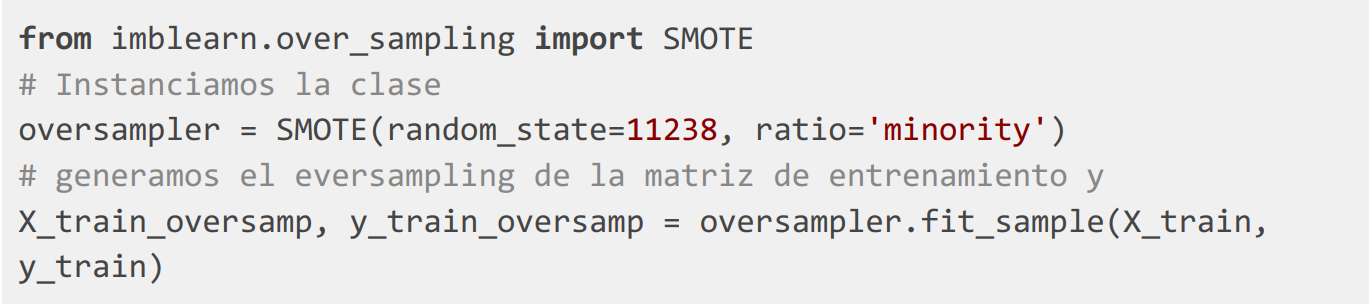

- Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño.

In [27]:
#Según lo solicitado importamos SMOTE
from imblearn.over_sampling import SMOTE

# Instanciamos la clase
oversampler = SMOTE(random_state=2401, sampling_strategy='minority')

# generamos el eversampling de la matriz de entrenamiento
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train, y_train)

In [28]:
#Creamos un nuevo modelo en base al mejor modelo anterior
lda_modelo_smote_60_40 = LinearDiscriminantAnalysis (priors = [0.6, 0.4])

#Entrenmos el modelo 
lda_modelo_smote_60_40.fit(X_train_oversamp, y_train_oversamp)


LinearDiscriminantAnalysis(priors=[0.6, 0.4])

In [29]:
#Realizamos las predicciones
y_hat_4_smote = lda_modelo_smote_60_40.predict(X_test)

In [30]:
#Evaluamos el resultado comparandolo con el mejor modelo anterior
report_modelo_4 = classification_report(y_test, y_hat_4_smote)

print(f'\nMetricas del modelo oversampled\n', report_modelo_4)


print(f'\nMetricas del modelo 60/40\n', report_modelo_3)




Metricas del modelo oversampled
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      3199
           1       0.19      0.91      0.31       101

    accuracy                           0.88      3300
   macro avg       0.59      0.89      0.62      3300
weighted avg       0.97      0.88      0.91      3300


Metricas del modelo 60/40
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      3199
           1       0.20      0.89      0.32       101

    accuracy                           0.88      3300
   macro avg       0.60      0.89      0.63      3300
weighted avg       0.97      0.88      0.92      3300



- No se observan cambios significativos entre los modelos

__________

## <font color='MediumSeaGreen'>Ejercicio 5: Refactorización 3 - QDA</font>

- Por último, implemente un modelo <span style='background:gainsboro'><font color='dimgray'> QuadraticDiscriminantAnalysis</font></span> con los datos aumentados artificialmente. Genere las métricas de desempeño.
- Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

In [31]:
#Implementamos el modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente
#Para este caso elegimos la que tuvo las mejores metricas anteriormente

qda_model_60_40 = QuadraticDiscriminantAnalysis (priors = [0.6, 0.4])

#Entrenmos el modelo 
qda_model_60_40.fit(X_train_oversamp, y_train_oversamp)

QuadraticDiscriminantAnalysis(priors=array([0.6, 0.4]))

In [32]:
#Realizamos las predicciones
y_hat_5_qda = qda_model_60_40.predict(X_test)

In [33]:
#Evaluamos el resultado comparandolo con el mejor modelo anterior
report_modelo_5 = classification_report(y_test, y_hat_5_qda)

print(f'\nMetricas QDA del modelo oversampled\n', report_modelo_4)


print(f'\nMetricas LDA del modelo oversampled\n', report_modelo_5)



Metricas QDA del modelo oversampled
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      3199
           1       0.19      0.91      0.31       101

    accuracy                           0.88      3300
   macro avg       0.59      0.89      0.62      3300
weighted avg       0.97      0.88      0.91      3300


Metricas LDA del modelo oversampled
               precision    recall  f1-score   support

           0       1.00      0.90      0.94      3199
           1       0.21      0.88      0.34       101

    accuracy                           0.89      3300
   macro avg       0.60      0.89      0.64      3300
weighted avg       0.97      0.89      0.92      3300



No se observan cambios significativos, sin embargo se prefieren los resultados obtenidos en las métricas con LDA del módelo oversampled, ya que en dicho modelo se observan una menor taza de falsos negativos al momento de predecir los clientes morosos. 

____________